In [1]:
import IPython
import pandas as pd
import numpy as np
from statistics import mode
import statsmodels.api as sm
import matplotlib.pyplot as plt  
from sklearn.preprocessing import MinMaxScaler

/Users/t_shahh/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# load modified file with some pre-processing completed
df = pd.read_csv("preprocessed_4.csv", index_col=0)
df.shape

(100120, 54)

In [3]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,0,0,0,1,1,1,1,1,0,0
age,1,2,3,4,5,6,7,8,9,10
admission_type_id,5,1,1,1,1,1,3,1,1,3
discharge_disposition_id,18,1,1,1,1,1,1,1,1,2
admission_source_id,1,7,7,7,7,1,1,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12
num_lab_procedures,41,59,11,44,51,31,70,73,68,33


In [4]:
# convert data type of nominal features in dataframe to 'object' type
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
          'age', 'A1Cresult', 'max_glu_serum', 'level1_diag1', 'level1_diag2', 'level1_diag3', 'level2_diag1', 'level2_diag2', 'level2_diag3']

df[i] = df[i].astype('object')

In [5]:
df.dtypes

encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [6]:
L1 = np.random.randint(1,10,20)
L2 = np.random.randint(1,20, 20)

datframe = pd.DataFrame()
datframe['L1'] = L1
datframe['L2'] = L2

In [7]:
datframe.corr()

,L1,L2
L1,1.000000,0.106997
L2,0.106997,1.000000


In [8]:
scaler = MinMaxScaler()
datframe = pd.DataFrame(scaler.fit_transform(datframe), columns = ['L1', 'L2'])
datframe.corr()

,L1,L2
L1,1.000000,0.106997
L2,0.106997,1.000000


In [9]:
"""
This code converts age as categorical variable to a continuous approximation by assuming mid-point of each age-category as
the actual age value. This is done to avoid having to deal with age as a dummy variable in the models which makes
interpretation very cumbersome. Also, since age category is not purely nominal but ordinal, we do not want to lose that
information by treating it as a simple categorical variable.
"""

# convert age back to integer type
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

8     25564
7     22186
6     17102
9     16708
5      9626
4      3765
10     2669
3      1650
2       690
1       160
Name: age, dtype: int64
75    25564
65    22186
55    17102
85    16708
45     9626
35     3765
95     2669
25     1650
15      690
5       160
Name: age, dtype: int64


In [10]:
# get list of only numeric features
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})

In [11]:
num_col

['num_lab_procedures',
 'number_outpatient',
 'nummed',
 'service_utilization',
 'number_emergency',
 'numchange',
 'number_diagnoses',
 'age',
 'num_procedures',
 'num_medications',
 'time_in_hospital',
 'number_inpatient']

In [12]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value (2)

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)
    
    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = df[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [13]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,num_lab_procedures,-0.241491,-0.253099,19.620228,No,NA,-0.241491,-0.253099,19.620228
1,number_outpatient,8.818291,148.558544,1.263973,Yes,log1p,2.733914,7.804218,0.429394
2,nummed,0.675116,0.277244,0.921620,No,NA,0.675116,0.277244,0.921620
3,service_utilization,5.334724,67.779770,2.292730,Yes,log1p,1.119136,0.547353,0.662373
4,number_emergency,22.842251,1185.246374,0.935517,Yes,log1p,3.661064,16.276610,0.315405
5,numchange,1.425310,1.433619,0.487858,No,NA,1.425310,1.433619,0.487858
6,number_diagnoses,-0.867785,-0.109005,1.938211,No,NA,-0.867785,-0.109005,1.938211
7,age,-0.626715,0.274302,15.947496,No,NA,-0.626715,0.274302,15.947496
8,num_procedures,1.326020,0.890773,1.700335,No,NA,1.326020,0.890773,1.700335
9,num_medications,1.333039,3.523472,8.092612,No,NA,1.333039,3.523472,8.092612


In [14]:
# performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

In [15]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency','service_utilization'], axis = 1)

In [16]:
df.shape

(100120, 54)

In [17]:
# get list of only numeric features
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})

In [18]:
numerics

['number_outpatient_log1p',
 'num_lab_procedures',
 'nummed',
 'numchange',
 'number_diagnoses',
 'number_inpatient_log1p',
 'age',
 'num_procedures',
 'num_medications',
 'number_emergency_log1p',
 'service_utilization_log1p',
 'time_in_hospital']

In [19]:
# show list of features that are categorical
df.encounter_id = df.encounter_id.astype('int64')
df.patient_nbr = df.patient_nbr.astype('int64')
df.diabetesMed = df.diabetesMed.astype('int64')
df.change = df.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
df[i] = df[i].astype('int64')

df.dtypes

encounter_id                   int64
patient_nbr                    int64
race                          object
gender                        object
age                            int64
admission_type_id             object
discharge_disposition_id      object
admission_source_id           object
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
diag_1                        object
diag_2                        object
diag_3                        object
number_diagnoses               int64
max_glu_serum                 object
A1Cresult                      int64
metformin                      int64
repaglinide                    int64
nateglinide                    int64
chlorpropamide                 int64
glimepiride                    int64
acetohexamide                  int64
glipizide                      int64
glyburide                      int64
tolbutamide                    int64
p

In [20]:
df.A1Cresult.value_counts()

-99    83243
 1     11935
 0      4942
Name: A1Cresult, dtype: int64

In [21]:
dfcopy = df.copy(deep = True)

In [22]:
df = dfcopy.copy(deep = True)

In [23]:
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 2 else x)

In [24]:
# drop individual diagnosis columns that have too granular disease information
# also drop level 2 categorization (which was not comparable with any reference)
# also drop level 1 secondary and tertiary diagnoses
df.drop(['diag_1', 'diag_2', 'diag_3', 'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
         'level2_diag3'], axis=1, inplace=True)

In [25]:
df.head(2)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,change,diabetesMed,readmitted,numchange,nummed,level1_diag1,number_outpatient_log1p,service_utilization_log1p,number_emergency_log1p,number_inpatient_log1p
0,2278392,8222157,Caucasian,0,5,5,18,1,1,41,...,0,0,0,0,0,4,0.0,0.0,0.0,0.0
1,149190,55629189,Caucasian,0,15,1,1,7,3,59,...,1,1,0,1,1,0,0.0,0.0,0.0,0.0


In [26]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [27]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [28]:
df[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
0,1,1,1
1,18,3,54
2,13,2,26
3,16,2,32
4,8,1,8


### Scaling applied to df; using df2 from here

In [29]:
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: df[x].std())
datf['mean'] = datf['features'].apply(lambda x: df[x].mean())

In [30]:
# Logical order: duplicate removal, then outlier removal followed by scaling

In [31]:
# dropping multiple encounters while keeping either first or last encounter of these patients
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(70442, 55)

In [32]:
import scipy as sp
df2 = df2[(np.abs(sp.stats.zscore(df2[numerics])) < 3).all(axis=1)]

In [33]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [34]:
df2[numerics] = standardize(df2[numerics])

In [35]:
import seaborn as sns
from matplotlib.colors import ListedColormap
# my_cmap = ListedColormap(sns.color_palette("RdYlGn", n_colors=15).as_hex())
# my_cmap = ListedColormap(sns.diverging_palette(150, 250, sep=120, n=28, center="light").as_hex())

my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
# drop some columns due to their means is round to 0
# table = df.drop(['acetohexamide','tolbutamide', 'troglitazone', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','patient_nbr', 'encounter_id', 'service_utilization_log1p'], axis = 1).corr(method='pearson')
table = df2.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

/Users/t_shahh/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


In [36]:
pd.options.display.max_rows = 400

c = df2.corr().abs()
s = c.unstack()
print(s.shape)
so = s.sort_values(ascending=False)

so[38:120]

(2304,)


glipizide                            glipizide                              1.000000
glyburide                            glyburide                              1.000000
tolbutamide                          tolbutamide                            1.000000
pioglitazone                         pioglitazone                           1.000000
rosiglitazone                        rosiglitazone                          1.000000
acarbose                             acarbose                               1.000000
change|num_medications               change|num_medications                 1.000000
encounter_id                         encounter_id                           1.000000
time_in_hospital                     number_diagnoses|time_in_hospital      0.935819
number_diagnoses|time_in_hospital    time_in_hospital                       0.935819
numchange                            num_medications|numchange              0.899794
num_medications|numchange            numchange                   

In [37]:
df2['level1_diag1'] = df2['level1_diag1'].astype('object')
df_pd = pd.get_dummies(df2, columns=['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'], drop_first = True)

In [38]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1' ]

In [39]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['troglitazone',
 'glyburide-metformin',
 'diabetesMed',
 'rosiglitazone',
 'time_in_hospital|num_lab_procedures',
 'num_procedures',
 'num_medications|num_procedures',
 'number_diagnoses|time_in_hospital',
 'num_lab_procedures',
 'insulin',
 'change|num_medications',
 'glyburide',
 'num_medications|num_lab_procedures',
 'repaglinide',
 'miglitol',
 'tolazamide',
 'metformin-pioglitazone',
 'numchange',
 'metformin',
 'number_outpatient_log1p',
 'patient_nbr',
 'age|number_diagnoses',
 'nummed',
 'tolbutamide',
 'number_diagnoses',
 'number_inpatient_log1p',
 'encounter_id',
 'glimepiride-pioglitazone',
 'nateglinide',
 'num_medications|time_in_hospital',
 'acarbose',
 'glipizide-metformin',
 'glipizide',
 'acetohexamide',
 'A1Cresult',
 'num_medications|numchange',
 'pioglitazone',
 'glimepiride',
 'age',
 'num_medications|number_diagnoses',
 'chlorpropamide',
 'num_medications',
 'metformin-rosiglitazone',
 'number_emergency_log1p',
 'service_utilization_log1p',
 'time_in_hospital']

In [40]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

# new_non_num_cols

In [41]:
new_non_num_cols

['race_AfricanAmerican',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_1',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'discharge_disposition_id_2',
 'discharge_disposition_id_7',
 'discharge_disposition_id_10',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'admission_source_id_4',
 'admission_source_id_7',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'max_glu_serum_0',
 'max_glu_serum_1',
 'A1Cresult_0',
 'A1Cresult_1',
 'level1_diag1_1.0',
 'level1_diag1_2.0',
 'level1_diag1_3.0',
 'level1_diag1_4.0',
 'level1_diag1_5.0',
 'level1_diag1_6.0',
 'level1_diag1_7.0',
 'level1_diag1_8.0']

In [42]:
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'change|num_medications',
 'number_diagnoses|time_in_hospital',
 'num_medications|numchange']

### Modeling

In [47]:
feature_set_1 = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 
                 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 
                 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
                 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 
                 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 
                 'race_Hispanic', 'race_Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_4', 'admission_type_id_5', 
                 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 
                 'admission_source_id_4', 'admission_source_id_7', 'admission_source_id_8', 
                 'admission_source_id_9', 'admission_source_id_11', 'max_glu_serum_0', 
                 'max_glu_serum_1', 'A1Cresult_0', 'A1Cresult_1', 
                 'num_medications|time_in_hospital',
                 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures',
                 'num_medications|num_lab_procedures',
                 'num_medications|number_diagnoses',
                 'age|number_diagnoses',
                 'change|num_medications',
                 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange', 
                 'level1_diag1_1.0',
                 'level1_diag1_2.0',
                 'level1_diag1_3.0',
                 'level1_diag1_4.0',
                 'level1_diag1_5.0',
                 'level1_diag1_6.0',
                 'level1_diag1_7.0',
                 'level1_diag1_8.0']

In [48]:
feature_set_2 = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'service_utilization_log1p', 
                 'number_diagnoses', 'nummed', 'race_AfricanAmerican', 'race_Asian', 
                 'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_4', 'admission_type_id_5', 
                 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 
                 'admission_source_id_4', 'admission_source_id_7', 'admission_source_id_8', 
                 'admission_source_id_9', 'admission_source_id_11', 'numchange', 
                 'num_medications|time_in_hospital',
                 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures',
                 'num_medications|num_lab_procedures',
                 'num_medications|number_diagnoses',
                 'age|number_diagnoses',
                 'change|num_medications',
                 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange',
                 'level1_diag1_1.0',
                 'level1_diag1_2.0',
                 'level1_diag1_3.0',
                 'level1_diag1_4.0',
                 'level1_diag1_5.0',
                 'level1_diag1_6.0',
                 'level1_diag1_7.0',
                 'level1_diag1_8.0']

In [49]:
# full_feature_list = ['age', 'time_in_hospital', 'num_lab_procedures',
#        'num_procedures', 'num_medications', 'number_outpatient_log1p',
#        'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses',
#        'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
#        'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
#        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
#        'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
#        'glimepiride-pioglitazone', 'metformin-rosiglitazone',
#        'metformin-pioglitazone', 'diabetesMed', 'service_utilization_log1p',
#        'level1_diag1', 'race_?', 'race_AfricanAmerican', 'race_Asian',
#        'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_0', 'gender_1',
#        'admission_type_id_1', 'admission_type_id_2', 'admission_type_id_3',
#        'admission_type_id_4', 'admission_type_id_5', 'admission_type_id_6',
#        'admission_type_id_7', 'admission_type_id_8',
#        'discharge_disposition_id_1', 'discharge_disposition_id_2',
#        'discharge_disposition_id_3', 'discharge_disposition_id_4',
#        'discharge_disposition_id_5', 'discharge_disposition_id_6',
#        'discharge_disposition_id_7', 'discharge_disposition_id_8',
#        'discharge_disposition_id_9', 'discharge_disposition_id_10',
#        'discharge_disposition_id_12', 'discharge_disposition_id_13',
#        'discharge_disposition_id_14', 'discharge_disposition_id_15',
#        'discharge_disposition_id_16', 'discharge_disposition_id_17',
#        'discharge_disposition_id_18', 'discharge_disposition_id_19',
#        'discharge_disposition_id_20', 'discharge_disposition_id_22',
#        'discharge_disposition_id_23', 'discharge_disposition_id_24',
#        'discharge_disposition_id_25', 'discharge_disposition_id_27',
#        'discharge_disposition_id_28', 'admission_source_id_1',
#        'admission_source_id_2', 'admission_source_id_3',
#        'admission_source_id_4', 'admission_source_id_5',
#        'admission_source_id_6', 'admission_source_id_7',
#        'admission_source_id_8', 'admission_source_id_9',
#        'admission_source_id_10', 'admission_source_id_11',
#        'admission_source_id_13', 'admission_source_id_14',
#        'admission_source_id_17', 'admission_source_id_20',
#        'admission_source_id_22', 'admission_source_id_25', 'max_glu_serum_-99',
#        'max_glu_serum_0', 'max_glu_serum_1', 'A1Cresult_-99', 'A1Cresult_0',
#        'A1Cresult_1', 'nummed', 'numchange', 'nummed|change',
#      'num_medications|time_in_hospital',
#      'num_medications|num_procedures',
#      'time_in_hospital|num_lab_procedures',
#      'num_medications|num_lab_procedures',
#      'num_medications|number_diagnoses',
#      'age|number_diagnoses',
#      'change|num_medications',
#      'number_diagnoses|time_in_hospital',
#      'num_medications|numchange']

In [50]:
train_input = df_pd[feature_set_1]
train_output = df_pd['readmitted']

In [51]:
df_pd['readmitted'].value_counts()

0    56476
1     5199
Name: readmitted, dtype: int64

In [52]:
train_input.columns

Index(['age', 'time_in_hospital', 'num_procedures', 'num_medications',
       'number_outpatient_log1p', 'number_emergency_log1p',
       'number_inpatient_log1p', 'number_diagnoses', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'race_AfricanAmerican', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_1',
       'admission_type_id_3', 'admission_type_id_4', 'admission_type_id_5',
       'discharge_disposition_id_2', 'discharge_disposition_id_7',
       'discharge_disposition_id_10', 'discharge_disposition_id_18',
       'admission_source_id_4', 'admission_source_id_7',
       'admission_source_id_8', 'admissi

In [53]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import RandomizedLogisticRegression
# clffeat = RandomizedLogisticRegression()
# X_train, X_dev, Y_train, Y_dev = train_test_split(train_input, train_output, test_size=0.20, random_state=0)
# clffeat.fit(train_input,train_output)
# lstfeat = list(clffeat.get_support(indices=True))
# score = list(clffeat.all_scores_)

In [54]:
# favorfeatures = [list(X_train.columns)[i] for i in lstfeat]

In [55]:
# score  = [float(x) for x in score]
# Z = [(x[1],x[0]) for x in sorted(zip(score,X_train.columns), reverse = True)]
# Znew = []
# for x in Z:
#     if x[0] in favorfeatures:
#         Znew.append(x)

In [56]:
# Znew

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input, train_output, test_size=0.20, random_state=0)
logreg = LogisticRegression(fit_intercept=True)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(logreg, X_train, Y_train, cv=25))))
logreg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(logreg.score(X_dev, Y_dev)))

Cross Validation Score: 91.67%
Dev Set score: 91.16%


In [58]:
Y_dev_predict = logreg.predict(X_dev)

In [59]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,All
Actual,,
0,1580,1580
1,157,157
All,1737,1737


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))

Accuracy is 0.91
Precision is 0.00
Recall is 0.00


/Users/t_shahh/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
from imblearn.over_sampling import SMOTE

from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 56476, 1: 5199})
New dataset shape Counter({0: 56476, 1: 56476})


In [62]:
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logreg = LogisticRegression(fit_intercept=True)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(logreg, X_train, Y_train, cv=25))))
logreg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(logreg.score(X_dev, Y_dev)))

Cross Validation Score: 61.10%
Dev Set score: 60.64%


In [64]:
Y_dev_predict = logreg.predict(X_dev)

In [65]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,7438,3830,11268
1,5062,6261,11323
All,12500,10091,22591


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

Accuracy is 0.61
Precision is 0.62
Recall is 0.55
AUC is 0.61


In [67]:
[print(fname, coeffs) for fname, coeffs in zip(X_train.columns, np.round(logreg.coef_[0],3))];

age 0.34
time_in_hospital 0.141
num_procedures -0.11
num_medications -0.094
number_outpatient_log1p 0.022
number_emergency_log1p 0.031
number_inpatient_log1p 0.151
number_diagnoses 0.431
metformin 0.018
repaglinide 0.57
nateglinide -0.177
chlorpropamide -0.409
glimepiride -0.013
acetohexamide 0.0
glipizide 0.152
glyburide 0.141
tolbutamide -0.204
pioglitazone -0.045
rosiglitazone 0.054
acarbose -0.286
miglitol -0.251
troglitazone -0.052
tolazamide -0.193
insulin 0.213
glyburide-metformin 0.188
glipizide-metformin -0.131
glimepiride-pioglitazone 0.0
metformin-rosiglitazone -0.023
metformin-pioglitazone -0.022
race_AfricanAmerican 0.227
race_Asian 0.116
race_Caucasian 0.176
race_Hispanic 0.122
race_Other -0.068
gender_1 0.03
admission_type_id_3 -0.077
admission_type_id_4 0.146
admission_type_id_5 -0.001
discharge_disposition_id_2 0.863
discharge_disposition_id_7 0.459
discharge_disposition_id_10 1.341
discharge_disposition_id_18 0.359
admission_source_id_4 -0.308
admission_source_id_7 -0

In [68]:
logreg.intercept_

array([ 0.666007])

In [69]:
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(max_depth=7, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dte, X_train, Y_train, cv=25))))
dte.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dte.score(X_dev, Y_dev)))

Cross Validation score: 90.04%
Dev Set score: 90.19%


In [70]:
Y_dev_predict = dte.predict(X_dev)

In [71]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,11154,114,11268
1,2103,9220,11323
All,13257,9334,22591


In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

Accuracy is 0.90
Precision is 0.99
Recall is 0.81
AUC is 0.90


In [73]:
from sklearn.tree import DecisionTreeClassifier
dtg = DecisionTreeClassifier(max_depth=7, criterion = "gini", min_samples_split=10)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(dtg, X_train, Y_train, cv=25))))
dtg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dtg.score(X_dev, Y_dev)))

Cross Validation Score: 90.33%
Dev Set score: 90.29%


In [74]:
Y_dev_predict = dtg.predict(X_dev)

In [75]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,11149,119,11268
1,2074,9249,11323
All,13223,9368,22591


In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

Accuracy is 0.90
Precision is 0.99
Recall is 0.82
AUC is 0.90


In [77]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 10, max_depth=7, criterion = "gini", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train, Y_train, cv=25))))
forrest.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

Cross Validation score: 91.33%
Dev Set score: 91.10%


In [78]:
Y_dev_predict = forrest.predict(X_dev)

In [79]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,10830,438,11268
1,1573,9750,11323
All,12403,10188,22591


In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

Accuracy is 0.91
Precision is 0.96
Recall is 0.86
AUC is 0.91


In [81]:
# valdepth= 0
# valsplit = 0
# valestimators = 0
# valscore = 0

# for b in range(5,15):
#     for i in range (3,15):
#         for z in range (5,15):
#             forrest = RandomForestClassifier(n_estimators = b, max_depth=i,criterion="gini",min_samples_split=z)
#             scores = cross_val_score(forrest, X_train, Y_train, cv=5)
#             score_mean = np.mean(scores)
#             if valscore < score_mean:
#                 valscore = score_mean
#                 valdepth = i
#                 valsplit = z
#                 valestimators = b

# forrest = RandomForestClassifier(n_estimators = b, max_depth=valdepth,criterion="entropy",min_samples_split=valsplit)

# print("MODEL: RANDOM FORESTS WITH GINI AS ATTRIBUTE SELECTION METHOD \n")
# print("\nParamters for best model \nmax_depth : " + str(valdepth) + "\nmin_samples_split : " + str(valsplit) + "\n")

# print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train[favorfeatures], Y_train, cv=25))))
# forrest.fit(X_train, Y_train)
# print("Dev Set Score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

In [82]:
coefs = [(x[2], x[1]) for x in sorted(zip(list(np.abs(logreg.coef_[0])), list(logreg.coef_[0]), list(train_input.columns)), reverse = True)]
print("Logistic Regression Coefficients in decreasing order of coefficient values")
coefs

Logistic Regression Coefficients in decreasing order of coefficient values


[('discharge_disposition_id_10', 1.3411710323474997),
 ('discharge_disposition_id_2', 0.86282897780538881),
 ('repaglinide', 0.56977541232955353),
 ('discharge_disposition_id_7', 0.45910990981867),
 ('number_diagnoses', 0.43135191664672407),
 ('chlorpropamide', -0.40866258170721853),
 ('discharge_disposition_id_18', 0.35871627622616414),
 ('age', 0.34045863144638944),
 ('admission_source_id_4', -0.30797645822035186),
 ('acarbose', -0.286043076597777),
 ('level1_diag1_1.0', 0.25784097681706503),
 ('miglitol', -0.25061992164420582),
 ('admission_source_id_9', -0.23731360023992454),
 ('race_AfricanAmerican', 0.2271375779556532),
 ('insulin', 0.21252347887258735),
 ('tolbutamide', -0.2044298224035101),
 ('tolazamide', -0.19260593736907072),
 ('level1_diag1_2.0', -0.18949720453070951),
 ('glyburide-metformin', 0.18811118619619435),
 ('nateglinide', -0.17732997673050971),
 ('race_Caucasian', 0.17553279191424317),
 ('level1_diag1_4.0', 0.1725639838021116),
 ('glipizide', 0.15163016714903155),

In [83]:
impforrest = [(x[1], x[0]) for x in sorted(zip(list(forrest.feature_importances_), list(train_input.columns)), reverse = True)]
print("Random Forest Feature Importance in decreasing order")
impforrest

Random Forest Feature Importance in decreasing order


[('discharge_disposition_id_2', 0.23632683805879301),
 ('gender_1', 0.13747597987431728),
 ('insulin', 0.098900771717139818),
 ('admission_source_id_7', 0.062546954650005787),
 ('level1_diag1_1.0', 0.049566616347783407),
 ('change|num_medications', 0.045607605815491808),
 ('level1_diag1_2.0', 0.042422824654469567),
 ('metformin', 0.040946391686227955),
 ('number_inpatient_log1p', 0.03635430581613959),
 ('race_AfricanAmerican', 0.036067661691158007),
 ('race_Caucasian', 0.033189248592963572),
 ('admission_type_id_5', 0.028583181546473664),
 ('admission_type_id_3', 0.027595096242478856),
 ('num_procedures', 0.015691029435891457),
 ('level1_diag1_4.0', 0.013515471431042864),
 ('level1_diag1_3.0', 0.012615122125389488),
 ('level1_diag1_5.0', 0.0093445657314341103),
 ('glimepiride', 0.0090217413834402845),
 ('num_medications|numchange', 0.0076613432031111418),
 ('A1Cresult_1', 0.0069454278620871513),
 ('admission_source_id_9', 0.0052296229576061027),
 ('age', 0.0050458280938301958),
 ('admi

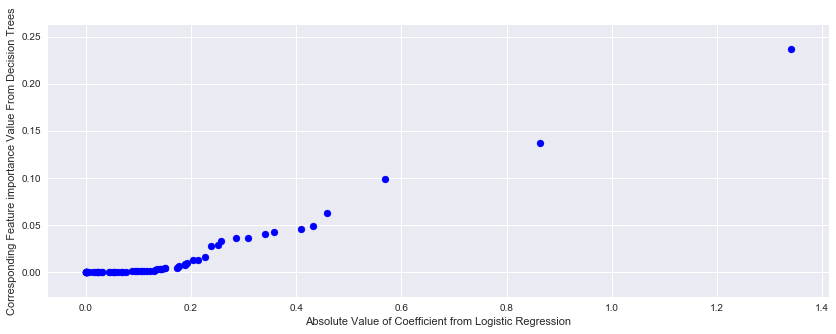

In [84]:
# plotting the absolute values of the coefficients from logistic regression with the feature importance from decision trees
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)
x = [np.abs(val[1]) for val in coefs]
y = [val[1] for val in impforrest]
plt.scatter(x, y, color = 'blue')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel("Absolute Value of Coefficient from Logistic Regression")
plt.ylabel("Corresponding Feature importance Value From Decision Trees")
plt.show()

## Feature set 2 (Simple)

In [86]:
train_input = df_pd[feature_set_2]
train_output = df_pd['readmitted']

In [87]:
from imblearn.over_sampling import SMOTE

from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 56476, 1: 5199})
New dataset shape Counter({0: 56476, 1: 56476})


In [88]:
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logreg = LogisticRegression(fit_intercept=True)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(logreg, X_train, Y_train, cv=25))))
logreg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(logreg.score(X_dev, Y_dev)))

Cross Validation Score: 60.76%
Dev Set score: 60.77%


In [90]:
Y_dev_predict = logreg.predict(X_dev)

In [91]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,7471,3797,11268
1,5065,6258,11323
All,12536,10055,22591


In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

Accuracy is 0.61
Precision is 0.62
Recall is 0.55
AUC is 0.61


In [93]:
[print(fname, coeffs) for fname, coeffs in zip(X_train.columns, np.round(logreg.coef_[0],3))];

age 0.358
time_in_hospital 0.126
num_lab_procedures -0.023
num_procedures -0.106
service_utilization_log1p 0.128
number_diagnoses 0.464
nummed 0.068
race_AfricanAmerican 0.212
race_Asian 0.095
race_Caucasian 0.146
race_Hispanic 0.104
race_Other -0.094
gender_1 0.034
admission_type_id_3 -0.095
admission_type_id_4 0.413
admission_type_id_5 0.02
discharge_disposition_id_2 0.872
discharge_disposition_id_7 0.459
discharge_disposition_id_10 2.217
discharge_disposition_id_18 0.334
admission_source_id_4 -0.283
admission_source_id_7 -0.125
admission_source_id_8 -0.075
admission_source_id_9 -0.238
admission_source_id_11 -0.199
numchange 0.161
num_medications|time_in_hospital 0.0
num_medications|num_procedures 0.001
time_in_hospital|num_lab_procedures -0.0
num_medications|num_lab_procedures 0.0
num_medications|number_diagnoses -0.001
age|number_diagnoses -0.003
change|num_medications -0.005
number_diagnoses|time_in_hospital -0.001
num_medications|numchange -0.015
level1_diag1_1.0 0.251
level1_dia

In [94]:
logreg.intercept_

array([ 1.00700185])

In [95]:
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(max_depth=7, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dte, X_train, Y_train, cv=25))))
dte.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dte.score(X_dev, Y_dev)))

Cross Validation score: 88.78%
Dev Set score: 88.68%


In [96]:
Y_dev_predict = dte.predict(X_dev)

In [97]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,10811,457,11268
1,2100,9223,11323
All,12911,9680,22591


In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

Accuracy is 0.89
Precision is 0.95
Recall is 0.81
AUC is 0.89


In [99]:
from sklearn.tree import DecisionTreeClassifier
dtg = DecisionTreeClassifier(max_depth=7, criterion = "gini", min_samples_split=10)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(dtg, X_train, Y_train, cv=25))))
dtg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(dtg.score(X_dev, Y_dev)))

Cross Validation Score: 90.61%
Dev Set score: 90.52%


In [100]:
Y_dev_predict = dtg.predict(X_dev)

In [101]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,11072,196,11268
1,1946,9377,11323
All,13018,9573,22591


In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

Accuracy is 0.91
Precision is 0.98
Recall is 0.83
AUC is 0.91


In [103]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 10, max_depth=7, criterion = "gini", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train, Y_train, cv=25))))
forrest.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

Cross Validation score: 91.81%
Dev Set score: 92.21%


In [104]:
Y_dev_predict = forrest.predict(X_dev)

In [105]:
pd.crosstab(pd.Series(Y_dev, name = 'Actual'), pd.Series(Y_dev_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,11129,139,11268
1,1620,9703,11323
All,12749,9842,22591


In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_dev, Y_dev_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_dev, Y_dev_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_dev, Y_dev_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_dev, Y_dev_predict)))

Accuracy is 0.92
Precision is 0.99
Recall is 0.86
AUC is 0.92


In [107]:
# valdepth= 0
# valsplit = 0
# valestimators = 0
# valscore = 0

# for b in range(5,15):
#     for i in range (3,15):
#         for z in range (5,15):
#             forrest = RandomForestClassifier(n_estimators = b, max_depth=i,criterion="gini",min_samples_split=z)
#             scores = cross_val_score(forrest, X_train, Y_train, cv=5)
#             score_mean = np.mean(scores)
#             if valscore < score_mean:
#                 valscore = score_mean
#                 valdepth = i
#                 valsplit = z
#                 valestimators = b

# forrest = RandomForestClassifier(n_estimators = b, max_depth=valdepth,criterion="entropy",min_samples_split=valsplit)

# print("MODEL: RANDOM FORESTS WITH GINI AS ATTRIBUTE SELECTION METHOD \n")
# print("\nParamters for best model \nmax_depth : " + str(valdepth) + "\nmin_samples_split : " + str(valsplit) + "\n")

# print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, X_train[favorfeatures], Y_train, cv=25))))
# forrest.fit(X_train, Y_train)
# print("Dev Set Score: {:.2%}".format(forrest.score(X_dev, Y_dev)))

In [108]:
coefs = [(x[2], x[1]) for x in sorted(zip(list(np.abs(logreg.coef_[0])), list(logreg.coef_[0]), list(train_input.columns)), reverse = True)]
print("Logistic Regression Coefficients in decreasing order of coefficient values")
coefs

Logistic Regression Coefficients in decreasing order of coefficient values


[('discharge_disposition_id_10', 2.217423400723066),
 ('discharge_disposition_id_2', 0.87197261879794019),
 ('number_diagnoses', 0.4642005325368832),
 ('discharge_disposition_id_7', 0.45870716691402957),
 ('admission_type_id_4', 0.41279804733284287),
 ('age', 0.35765705538951259),
 ('discharge_disposition_id_18', 0.33449490386805197),
 ('admission_source_id_4', -0.28268807069319885),
 ('level1_diag1_1.0', 0.25068956927784558),
 ('admission_source_id_9', -0.23750691246868111),
 ('race_AfricanAmerican', 0.21195799111504723),
 ('admission_source_id_11', -0.19893148999169855),
 ('level1_diag1_2.0', -0.19210425758532032),
 ('level1_diag1_4.0', 0.17339078340357741),
 ('numchange', 0.1611231924805033),
 ('race_Caucasian', 0.14623771088958981),
 ('level1_diag1_5.0', 0.13314971123894659),
 ('service_utilization_log1p', 0.12810898865200557),
 ('time_in_hospital', 0.12603384401486056),
 ('admission_source_id_7', -0.12495916401213168),
 ('level1_diag1_6.0', -0.10729587475636371),
 ('num_procedures

In [109]:
impforrest = [(x[1], x[0]) for x in sorted(zip(list(forrest.feature_importances_), list(train_input.columns)), reverse = True)]
print("Random Forest Feature Importance in decreasing order")
impforrest

Random Forest Feature Importance in decreasing order


[('discharge_disposition_id_2', 0.15728863175358304),
 ('level1_diag1_1.0', 0.12260440514851974),
 ('admission_source_id_7', 0.095202273929839862),
 ('admission_type_id_3', 0.076761011857024761),
 ('race_AfricanAmerican', 0.072391636119952571),
 ('numchange', 0.063738252855923438),
 ('race_Caucasian', 0.061783307422224244),
 ('nummed', 0.058294424495524445),
 ('service_utilization_log1p', 0.056736575429098879),
 ('gender_1', 0.053295897209762688),
 ('change|num_medications', 0.037649319580864489),
 ('level1_diag1_2.0', 0.028232933880377554),
 ('admission_type_id_5', 0.024323515928634257),
 ('num_medications|num_procedures', 0.013933425847662495),
 ('num_medications|numchange', 0.013671933947902528),
 ('level1_diag1_5.0', 0.011930310620429591),
 ('num_procedures', 0.011774865233492703),
 ('admission_source_id_4', 0.0058877329681638457),
 ('level1_diag1_3.0', 0.0049853869776330219),
 ('level1_diag1_7.0', 0.0041993123099340873),
 ('level1_diag1_6.0', 0.003534996464097774),
 ('admission_so

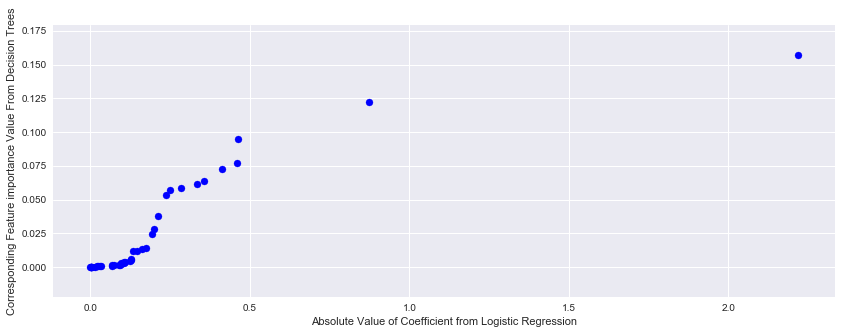

In [110]:
# plotting the absolute values of the coefficients from logistic regression with the feature importance from decision trees
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)
x = [np.abs(val[1]) for val in coefs]
y = [val[1] for val in impforrest]
plt.scatter(x, y, color = 'blue')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel("Absolute Value of Coefficient from Logistic Regression")
plt.ylabel("Corresponding Feature importance Value From Decision Trees")
plt.show()